In [59]:
# Importeren van de benodigde libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.inspection import permutation_importance


In [60]:
# Stap 1: Dataset laden
# Zorg ervoor dat je het juiste pad naar je CSV-bestand opgeeft
data = pd.read_csv('cleaned_and_featured_data.csv', sep=';')

In [61]:
# Stap 2: Data voorbereiden
# Voorbeeld van het splitsen van features en labels
# X = data.drop(['HeartDisease', 'CaseNumber', 'LastName', 'PostCode'], axis=1)
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']  # Doelvariabele

# Converteer categorische kolommen naar numeriek (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

In [62]:
# Stap 3: Train-test splitsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Stap 4: Random Forest Classifier aanmaken en trainen
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Stap 5: Voorspellingen maken
y_pred = rf_classifier.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        79
           1       0.91      0.94      0.92       104

    accuracy                           0.91       183
   macro avg       0.91      0.91      0.91       183
weighted avg       0.91      0.91      0.91       183

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           69           10
Actual 1            6           98
ROC AUC Score: 0.95
Willekeurige Sample van 10 Rijen voor het Eerste Model:
     Actual  Predicted  Predicted Probability
72        0          0                   0.07
218       0          0                   0.05
731       0          1                   0.67
660       1          0                   0.50
518       1          1                   0.96
39        1          1                   0.91
70        0          0                   0.08
755       1          1                   0.99
559       1          1               

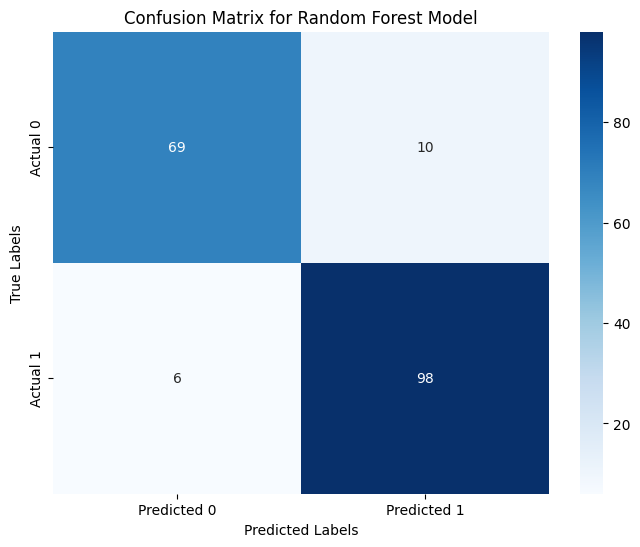

In [65]:
# Stap 6: Model evalueren
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Bereken de confusion matrix
cm_best = confusion_matrix(y_test, y_pred)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df_best)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')

# Resultaten DataFrame voor het eerste model
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Voorspelde waarschijnlijkheden
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_proba
})

# Selecteer een willekeurige sample van 20 rijen
random_sample = results_df.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen voor het Eerste Model:")
print(random_sample)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [66]:
# Stap 7: Hypertuning met GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Beste model en hyperparameters
best_rf_model = grid_search.best_estimator_
print("Beste Hyperparameters:", grid_search.best_params_)

Beste Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


Classification Report voor het Beste Model:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        79
           1       0.90      0.93      0.92       104

    accuracy                           0.90       183
   macro avg       0.90      0.90      0.90       183
weighted avg       0.90      0.90      0.90       183

Confusion Matrix voor het Beste Model:
          Predicted 0  Predicted 1
Actual 0           68           11
Actual 1            7           97
ROC AUC Score voor het Beste Model: 0.95
Willekeurige Sample van 10 Rijen voor het Beste Model:
     Actual  Predicted  Predicted Probability
72        0          0               0.032670
218       0          0               0.054153
731       0          1               0.649332
660       1          1               0.603544
518       1          1               0.885989
39        1          1               0.887346
70        0          0               0.090064
755       1          

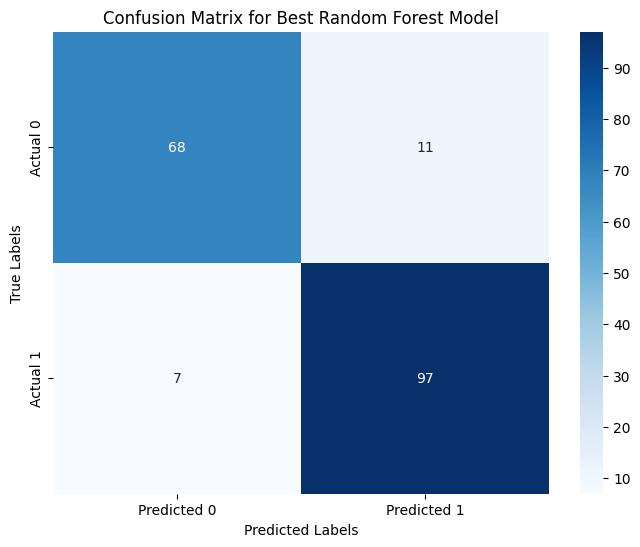

In [67]:
# Stap 8: Evalueren van het beste model
y_pred_best = best_rf_model.predict(X_test)

# Voorspelde waarschijnlijkheden
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

# Classificatie rapport
print("Classification Report voor het Beste Model:")
print(classification_report(y_test, y_pred_best))

# Bereken de confusion matrix voor het beste model
cm_best = confusion_matrix(y_test, y_pred_best)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix voor het beste model
print("Confusion Matrix voor het Beste Model:")
print(cm_df_best)

# ROC AUC Score voor het beste model
roc_auc_best = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score voor het Beste Model: {roc_auc_best:.2f}')

# Resultaten DataFrame voor het beste model
results_df_best = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 20 rijen
random_sample_best = results_df_best.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen voor het Beste Model:")
print(random_sample_best)

# Visualiseer de confusion matrix voor het beste model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Permutation Importance:
                       Importance
ST_Slope_Up              0.060109
Male                     0.033515
Oldpeak                  0.030237
MaxHR                    0.021676
FastingBS                0.020401
ChestPainType_ATA        0.018215
ExerciseAngina _ True    0.016758
ST_Slope_Flat            0.014208
ChestPainType_NAP        0.014026
RestingECG               0.008925
RestingBP                0.007104
Age                      0.005282
ChestPainType_TA         0.005282
Cholesterol_M            0.002550
Cholesterol_L           -0.000729


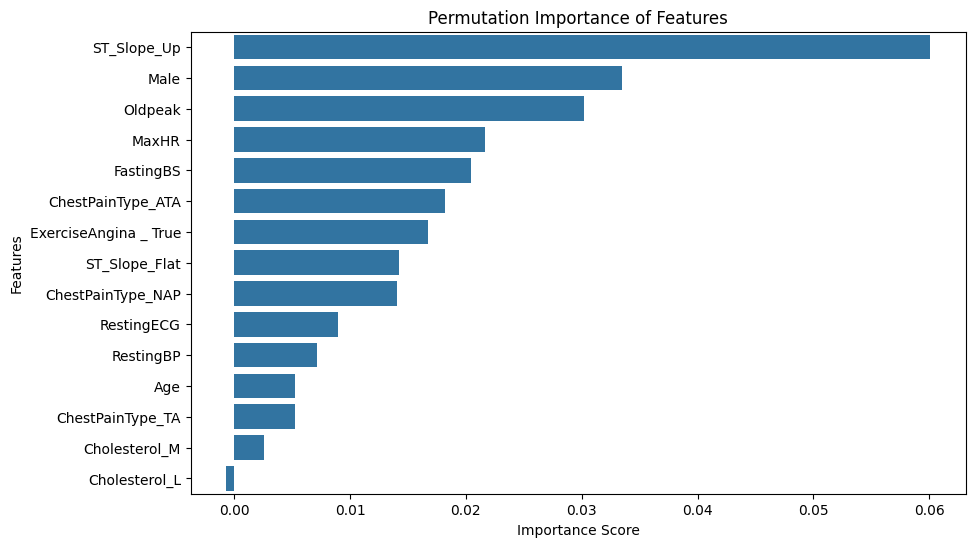

In [68]:
# Stap 9: Permutation Importance
result = permutation_importance(best_rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Zet de resultaten om in een DataFrame
importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Print de permutation importance
print("Permutation Importance:")
print(importance_df)

# Visualiseer de permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title('Permutation Importance of Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

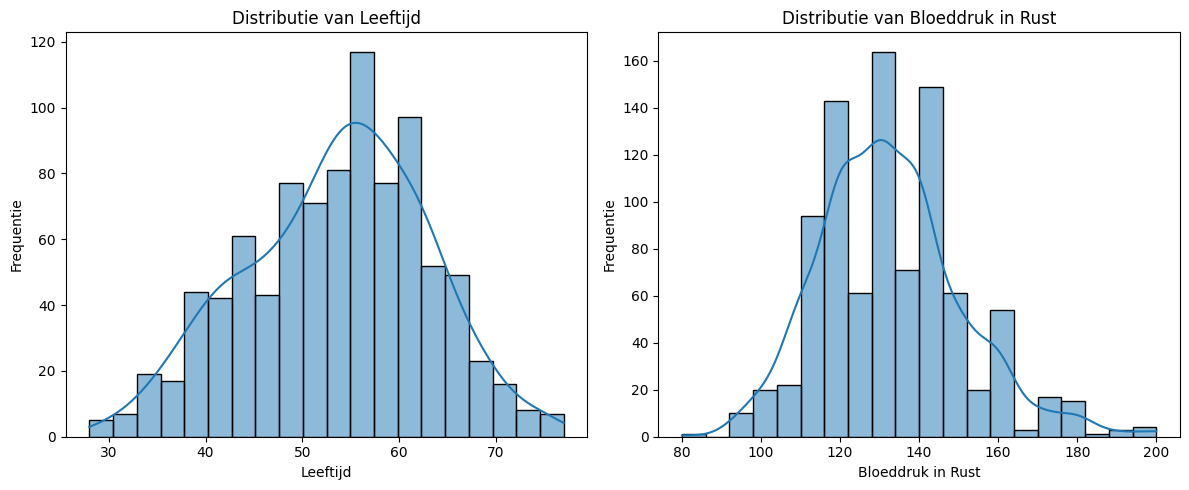

In [69]:
# Visualiseer de distributie van 'Age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distributie van Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Frequentie')

# Visualiseer de distributie van 'RestingBP'
plt.subplot(1, 2, 2)
sns.histplot(data['RestingBP'], bins=20, kde=True)
plt.title('Distributie van Bloeddruk in Rust')
plt.xlabel('Bloeddruk in Rust')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()


# Minder false positives

Classification Report na Drempelaanpassing:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        79
           1       0.69      1.00      0.82       104

    accuracy                           0.75       183
   macro avg       0.85      0.71      0.70       183
weighted avg       0.83      0.75      0.72       183

Willekeurige Sample van 10 Rijen na Drempelaanpassing:
     Actual  Predicted  Predicted Probability
72        0          0               0.032670
218       0          0               0.054153
731       0          1               0.649332
660       1          1               0.603544
518       1          1               0.885989
39        1          1               0.887346
70        0          0               0.090064
755       1          1               0.974361
559       1          1               0.917415
394       0          0               0.059711
Confusion Matrix na Drempelaanpassing:
          Predicted 0  Predic

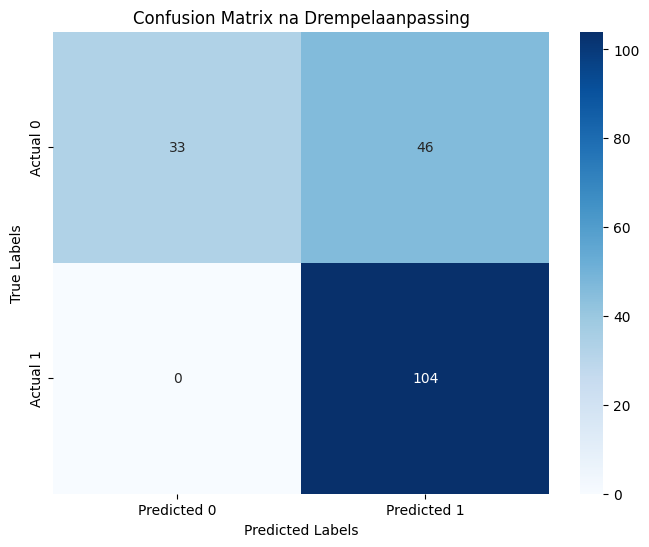

In [72]:
# Voorspellingen maken
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

# Pas de drempel aan (bijv. naar 0.3)
threshold = 0.1
y_pred_adjusted = (y_pred_proba_best >= threshold).astype(int)

# Evalueer de resultaten met de aangepaste drempel
print("Classification Report na Drempelaanpassing:")
print(classification_report(y_test, y_pred_adjusted))

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_adjusted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_adjusted,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 10 rijen
random_sample_adjusted = results_df_adjusted.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen na Drempelaanpassing:")
print(random_sample_adjusted)

# Bereken de confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Zet de confusion matrix om in een DataFrame
cm_df_adjusted = pd.DataFrame(cm_adjusted, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix voor het aangepaste model
print("Confusion Matrix na Drempelaanpassing:")
print(cm_df_adjusted)

# Visualiseer de confusion matrix voor het aangepaste model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix na Drempelaanpassing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
